In [3]:
# import libraries
import numpy as np
import pandas as pd

from warnings import filterwarnings
filterwarnings("ignore")

from pathlib import Path

In [4]:
# Set relative path to the dataset folder
data_path = Path("01_data")

# Read CSV files from data_path
train = pd.read_csv(data_path/'train.csv')
test = pd.read_csv(data_path/'test.csv')

print(f"- train.csv: {train.shape}")
print(f"- test.csv: {test.shape}")

# Clean column names for all DataFrames: apply lower() and strip()
# Store original columns for reference
original_train_cols = train.columns.tolist()
original_test_cols = test.columns.tolist()

# Clean column names
train.columns = train.columns.str.lower().str.strip()
test.columns = test.columns.str.lower().str.strip()

- train.csv: (8990, 98)
- test.csv: (10, 99)


In [5]:
train.head()

,date_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,v3,v4,v5,v6,v7,v8,v9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [6]:
train.columns

Index(['date_id', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'e1',
       'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19',
       'e2', 'e20', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'i1', 'i2', 'i3',
       'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'm1', 'm10', 'm11', 'm12', 'm13',
       'm14', 'm15', 'm16', 'm17', 'm18', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7',
       'm8', 'm9', 'p1', 'p10', 'p11', 'p12', 'p13', 'p2', 'p3', 'p4', 'p5',
       'p6', 'p7', 'p8', 'p9', 's1', 's10', 's11', 's12', 's2', 's3', 's4',
       's5', 's6', 's7', 's8', 's9', 'v1', 'v10', 'v11', 'v12', 'v13', 'v2',
       'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

In [7]:
# print(train.forward_returns.sample(3))
# print(train.forward_returns.sample(3))
# print(train.market_forward_excess_returns.sample(3))

In [8]:
"""
train.csv Historic market data. 
The coverage stretches back decades; expect to see extensive missing values early on.

date_id - An identifier for a single trading day.
M* - Market Dynamics/Technical features.
E* - Macro Economic features.
I* - Interest Rate features.
P* - Price/Valuation features.
V* - Volatility features.
S* - Sentiment features.
MOM* - Momentum features.
D* - Dummy/Binary features.

forward_returns - The returns from buying the S&P 500 and selling it a day later. Train set only.

risk_free_rate - The federal funds rate. Train set only.

market_forward_excess_returns - Forward returns relative to expectations. 
Computed by subtracting the rolling five-year mean forward returns and winsorizing 
the result using a median absolute deviation (MAD) with a criterion of 4. Train set only.
""";

In [9]:
test.head()

,date_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,v4,v5,v6,v7,v8,v9,is_scored,lagged_forward_returns,lagged_risk_free_rate,lagged_market_forward_excess_returns
0,8980,0,0,0,0,1,0,0,1,0,...,0.828042,0.999172,0.759921,-0.803127,0.170966,-0.751909,True,0.003541,0.000161,0.003068
1,8981,0,0,0,0,1,0,0,1,0,...,0.831349,1.120336,0.556217,-0.686192,0.141865,-0.660326,True,-0.005964,0.000162,-0.006437
2,8982,0,0,0,0,1,0,0,0,1,...,0.832672,1.088992,0.665344,-0.459367,0.199405,-0.510979,True,-0.007410,0.000160,-0.007882
3,8983,0,0,0,0,1,0,0,0,1,...,0.835979,1.040988,0.594577,-0.561643,0.161706,-0.575997,True,0.005420,0.000160,0.004949
4,8984,0,0,0,0,0,0,1,0,1,...,0.839947,0.944593,0.715608,-0.692649,0.124669,-0.654045,True,0.008357,0.000159,0.007887


In [10]:
test.columns

Index(['date_id', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'e1',
       'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19',
       'e2', 'e20', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'i1', 'i2', 'i3',
       'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'm1', 'm10', 'm11', 'm12', 'm13',
       'm14', 'm15', 'm16', 'm17', 'm18', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7',
       'm8', 'm9', 'p1', 'p10', 'p11', 'p12', 'p13', 'p2', 'p3', 'p4', 'p5',
       'p6', 'p7', 'p8', 'p9', 's1', 's10', 's11', 's12', 's2', 's3', 's4',
       's5', 's6', 's7', 's8', 's9', 'v1', 'v10', 'v11', 'v12', 'v13', 'v2',
       'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'is_scored',
       'lagged_forward_returns', 'lagged_risk_free_rate',
       'lagged_market_forward_excess_returns'],
      dtype='object')

In [11]:
"""
test.csv 
A mock test set representing the structure of the unseen test set. 
The test set used for the public leaderboard set is a copy of the last 180 date IDs in the train set. 
As a result, the public leaderboard scores are not meaningful. 
The unseen copy of this file served by the evaluation API may be updated during the model training phase.

date_id
[feature_name] - The feature columns are the same as in train.csv.
is_scored - Whether this row is included in the evaluation metric calculation. 
During the model training phase this will be true for the first 180 rows only. Test set only.

lagged_forward_returns - The returns from buying the S&P 500 and selling it a day later, provided with a lag of one day.

lagged_risk_free_rate - The federal funds rate, provided with a lag of one day.

lagged_market_forward_excess_returns - Forward returns relative to expectations. 
Computed by subtracting the rolling five-year mean forward returns and winsorizing the result 
using a median absolute deviation (MAD) with a criterion of 4, provided with a lag of one day.

""";

In [12]:
# check columns in common
common_cols = set(original_train_cols).intersection(set(original_test_cols))
print(f"\n COMMON COLUMNS BETWEEN TRAIN AND TEST: {len(common_cols)}")
print(common_cols)

# check columns in train not in test
train_not_in_test = set(original_train_cols) - set(original_test_cols)
print(f"\n COLUMNS IN TRAIN NOT IN TEST: {len(train_not_in_test)}")
print(train_not_in_test)

# check columns in test not in train
test_not_in_train = set(original_test_cols) - set(original_train_cols)
print(f"\n COLUMNS IN TEST NOT IN TRAIN: {len(test_not_in_train)}")
print(test_not_in_train)


 COMMON COLUMNS BETWEEN TRAIN AND TEST: 95
{'P2', 'M18', 'M16', 'E1', 'M17', 'S2', 'V13', 'S10', 'M6', 'E17', 'M11', 'E20', 'P1', 'P13', 'S11', 'V12', 'D8', 'D1', 'V10', 'E12', 'E16', 'S12', 'P5', 'E2', 'E3', 'M4', 'V3', 'P6', 'E13', 'E15', 'S4', 'I3', 'M14', 'S3', 'V8', 'V2', 'E11', 'M1', 'I6', 'P8', 'V6', 'M3', 'I5', 'M12', 'S9', 'V1', 'D6', 'V5', 'D4', 'P4', 'E9', 'E8', 'E18', 'I7', 'D7', 'D9', 'M10', 'E6', 'V7', 'V9', 'E10', 'V11', 'date_id', 'I9', 'I4', 'I1', 'P9', 'I2', 'S8', 'D5', 'M5', 'P3', 'D3', 'S6', 'I8', 'P11', 'M13', 'E19', 'E7', 'V4', 'M15', 'S7', 'S1', 'D2', 'M8', 'P10', 'E4', 'M7', 'E14', 'E5', 'M2', 'M9', 'S5', 'P7', 'P12'}

 COLUMNS IN TRAIN NOT IN TEST: 3
{'market_forward_excess_returns', 'forward_returns', 'risk_free_rate'}

 COLUMNS IN TEST NOT IN TRAIN: 4
{'lagged_market_forward_excess_returns', 'is_scored', 'lagged_forward_returns', 'lagged_risk_free_rate'}


In [13]:
miss_train = 100 * train.isna().mean().sort_values(ascending=False)

# drop columns with more than 51% missing values
cols_to_drop = miss_train[miss_train > 51].index.tolist()
print(f"Dropping {len(cols_to_drop)} columns with more than 51% missing values:")
print(cols_to_drop)

# drop cols_to_drop from train dataset
train.drop(columns=cols_to_drop, inplace=True)

# fill missing values based on percentage
cols_fill_mean = miss_train[(miss_train > 21) & (miss_train <= 51)].index.tolist()
cols_fill_zero = miss_train[miss_train <= 21].index.tolist()

# remove dropped columns from fill lists
cols_fill_mean = [col for col in cols_fill_mean if col in train.columns]
cols_fill_zero = [col for col in cols_fill_zero if col in train.columns]

# apply filling
train[cols_fill_mean] = train[cols_fill_mean].fillna(train[cols_fill_mean].mean())
train[cols_fill_zero] = train[cols_fill_zero].fillna(0)

print("\nAfter filling missing values:")
print(f"train.shape: {train.shape}")
print(f"Filled {len(cols_fill_mean)} columns with mean")
print(f"Filled {len(cols_fill_zero)} columns with 0")

Dropping 7 columns with more than 51% missing values:
['e7', 'v10', 's3', 'm1', 'm13', 'm14', 'm6']

After filling missing values:
train.shape: (8990, 91)
Filled 6 columns with mean
Filled 85 columns with 0


In [14]:
# Features and Targets
exclude = {'date_id','forward_returns','risk_free_rate','market_forward_excess_returns'}
features = [c for c in train.columns if c not in exclude]
print(f"Number of candidate features: {len(features)}")
print(f"Candidate features:")
print(features)
print(f"Number of candidate Targets: {len(exclude)}")
print('Targets:')
print(['forward_returns','risk_free_rate','market_forward_excess_returns'])

Number of candidate features: 87
Candidate features:
['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'e1', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19', 'e2', 'e20', 'e3', 'e4', 'e5', 'e6', 'e8', 'e9', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'm10', 'm11', 'm12', 'm15', 'm16', 'm17', 'm18', 'm2', 'm3', 'm4', 'm5', 'm7', 'm8', 'm9', 'p1', 'p10', 'p11', 'p12', 'p13', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 's1', 's10', 's11', 's12', 's2', 's4', 's5', 's6', 's7', 's8', 's9', 'v1', 'v11', 'v12', 'v13', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']
Number of candidate Targets: 4
Targets:
['forward_returns', 'risk_free_rate', 'market_forward_excess_returns']


In [15]:
# PyCaret is trying to use classification on a continuous target variable 
# (market_forward_excess_returns). The target needs to be converted to categories first, 
# or you should use regression instead. Here are two solutions:

## Classification vs Regression in PyCaret

### **Classification**
Used when predicting **categorical/discrete outcomes**:

**When to use:**
- Binary outcomes: Yes/No, Buy/Sell, Positive/Negative returns
- Multi-class: Low/Medium/High risk categories
- Discrete labels: Market phases (Bull/Bear/Sideways)

**Metrics:**
- Accuracy, Precision, Recall, F1-Score
- ROC-AUC, Confusion Matrix
- Log Loss

**Models available:**
- Logistic Regression, Random Forest, XGBoost
- SVM, Naive Bayes, Neural Networks

**For your case:**


In [16]:
# # Converts continuous returns to binary Up/Down prediction
# model_data['target_class'] = (model_data['market_forward_excess_returns'] > 0).astype(int)

### **Regression**
Used when predicting **continuous numerical values**:

**When to use:**
- Exact return values: -0.05, +0.03, +0.12
- Price predictions: $150.25, $149.80
- Continuous scores: Risk scores, volatility measures

**Metrics:**
- MAE (Mean Absolute Error), MSE, RMSE
- R², Adjusted R²
- MAPE (Mean Absolute Percentage Error)

**Models available:**
- Linear Regression, Ridge, Lasso
- Random Forest Regressor, XGBoost Regressor
- Support Vector Regression

**For your case:**


In [17]:
# # Predicts exact excess return values
# target='market_forward_excess_returns'  # e.g., -0.023, +0.041

### **Which to Choose for Market Prediction?**

**Classification** - Better for:
- Trading signals (Buy/Sell decisions)
- Market direction (Up/Down)
- Risk categories (High/Low risk)
- Simpler interpretation

**Regression** - Better for:
- Portfolio optimization (exact return forecasts)
- Risk management (precise loss estimates)
- Position sizing (specific return expectations)

For most trading strategies, **Classification** is preferred because you typically care more about direction than exact magnitude.

In [18]:
# # Option 1: Convert to Classification - CORRECTED
# # Create DataFrame with features only (exclude target variable)
# model_data = train[features].copy()

# # Add the binary target based on market_forward_excess_returns
# model_data['target_class'] = (train['market_forward_excess_returns'] > 0).astype(int)

# from pycaret.classification import *
# classification = setup(model_data, target='target_class', session_id=111)

# best_classification = classification.compare_models()

In [19]:
# classification.evaluate_model(best_classification)

In [20]:
# Option 2: Use Regression Instead
# Create DataFrame with features AND target
model_data = train[features].copy()
model_data['market_forward_excess_returns'] = train['market_forward_excess_returns']

from pycaret.regression import *
regression = setup(model_data, target='market_forward_excess_returns', session_id=456)

best_regression = regression.compare_models()

,Description,Value
0,Session id,456
1,Target,market_forward_excess_returns
2,Target type,Regression
3,Original data shape,"(8990, 88)"
4,Transformed data shape,"(8990, 88)"
5,Transformed train set shape,"(6293, 88)"
6,Transformed test set shape,"(2697, 88)"
7,Numeric features,87
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0075,0.0001,0.0105,0.0055,0.0096,1.4195,0.0210
omp,Orthogonal Matching Pursuit,0.0075,0.0001,0.0105,0.0041,0.0097,1.4260,0.0180
par,Passive Aggressive Regressor,0.0075,0.0001,0.0106,-0.0020,0.0105,1.0000,0.0190
llar,Lasso Least Angle Regression,0.0075,0.0001,0.0106,-0.0025,0.0104,1.0061,0.0190
dummy,Dummy Regressor,0.0075,0.0001,0.0106,-0.0025,0.0104,1.0061,0.0200
en,Elastic Net,0.0075,0.0001,0.0106,-0.0025,0.0104,1.0061,0.0190
lasso,Lasso Regression,0.0075,0.0001,0.0106,-0.0025,0.0104,1.0061,0.2460
ridge,Ridge Regression,0.0076,0.0001,0.0106,-0.0055,0.0094,1.7134,0.0200
lr,Linear Regression,0.0076,0.0001,0.0106,-0.0065,0.0094,1.7338,0.4090
huber,Huber Regressor,0.0075,0.0001,0.0106,-0.0085,0.0093,1.6594,0.1280


In [21]:
regression.evaluate_model(best_regression)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Here are several ways to extract feature importance the trained PyCaret regression model:

## Method 1: Using PyCaret's interpret_model()



In [32]:
# # to fix
# # Fix: Use correct plot types for interpret_model
# # Available plot types: 'summary', 'correlation', 'reason', 'pdp', 'msa', 'pfi'

# # For feature importance, use 'pfi' (Permutation Feature Importance)
# feature_importance_plot = interpret_model(best_regression, plot='pfi')

# # Alternative: Get SHAP summary plot
# shap_summary_plot = interpret_model(best_regression, plot='summary')

# # For partial dependence plots (individual feature effects)
# # pdp_plot = interpret_model(best_regression, plot='pdp', feature='feature_name')

# # For correlation analysis
# correlation_plot = interpret_model(best_regression, plot='correlation')

In [31]:
# # to fix
# # All available interpret_model plot types:

# # 1. Permutation Feature Importance
# pfi_plot = interpret_model(best_regression, plot='pfi')

# # 2. SHAP Summary Plot
# summary_plot = interpret_model(best_regression, plot='summary')

# # 3. SHAP Reason Plot (for specific observations)
# # reason_plot = interpret_model(best_regression, plot='reason', observation=0)

# # 4. Partial Dependence Plot (specify feature name)
# # You need to specify a feature name from your dataset
# feature_list = regression.get_config('X_train').columns.tolist()
# print("Available features for PDP:", feature_list[:5])  # Show first 5 features
# # pdp_plot = interpret_model(best_regression, plot='pdp', feature=feature_list[0])

# # 5. Morris Sensitivity Analysis
# msa_plot = interpret_model(best_regression, plot='msa')

# # 6. Correlation Plot
# correlation_plot = interpret_model(best_regression, plot='correlation')

In [23]:
# # to fix
# # To get the actual values, you can also use:
# feature_importance_summary = interpret_model(best_regression, plot='summary')



## Method 2: Direct Access to Model's Feature Importance



In [34]:
# Access the underlying model's feature importance (coefficients for Bayesian Ridge)
feature_names = regression.get_config('X_train').columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': best_regression.coef_
})
importance_df['abs_coefficient'] = abs(importance_df['coefficient'])
importance_df = importance_df.sort_values('abs_coefficient', ascending=False)
print("Feature Importance (Bayesian Ridge coefficients):")
print(importance_df.head(10))

# Also show the model type for confirmation
print(f"\nModel type: {type(best_regression).__name__}")

Feature Importance (Bayesian Ridge coefficients):
   feature  coefficient  abs_coefficient
60      p6    -0.000692         0.000692
46      m4    -0.000636         0.000636
86      v9    -0.000610         0.000610
78     v13     0.000593         0.000593
38     m11     0.000518         0.000518
0       d1     0.000511         0.000511
1       d2     0.000511         0.000511
68      s2    -0.000486         0.000486
7       d8     0.000474         0.000474
4       d5     0.000409         0.000409

Model type: BayesianRidge




## Method 3: Using SHAP Values



Feature Importance (SHAP values):
   feature  importance
46      m4    0.000453
38     m11    0.000447
78     v13    0.000445
68      s2    0.000363
60      p6    0.000361
39     m12    0.000341
64      s1    0.000318
86      v9    0.000300
17     e17    0.000271
61      p7    0.000221


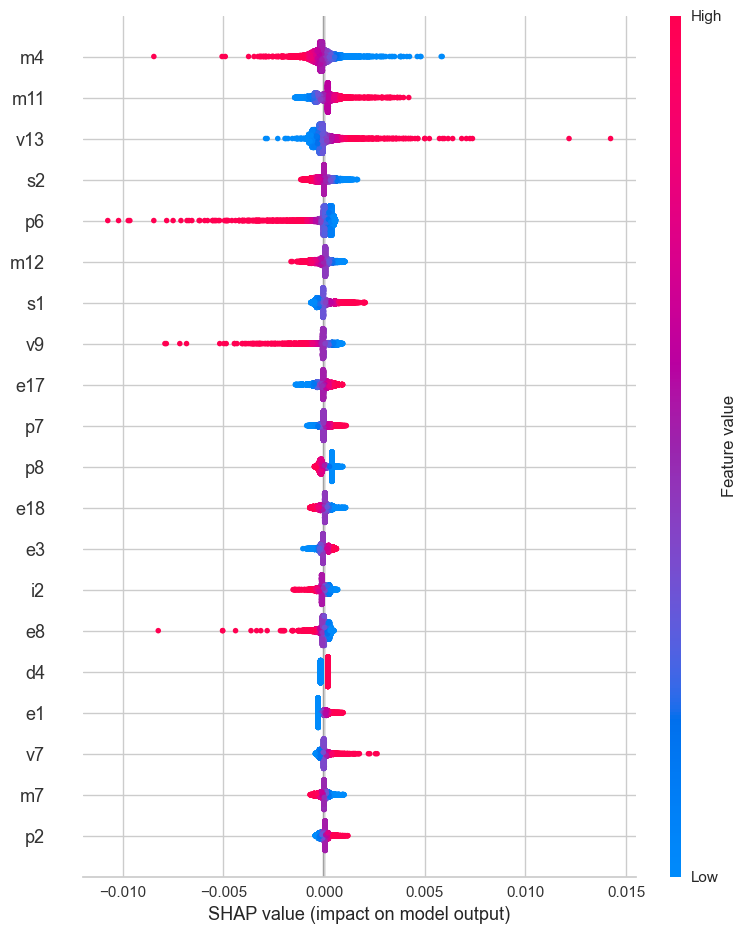

In [25]:
# Install shap if not already installed: pip install shap
import shap

# Get training data
X_train = regression.get_config('X_train')

# Create SHAP explainer
explainer = shap.Explainer(best_regression, X_train)
shap_values = explainer(X_train)

# Get feature importance as mean absolute SHAP values
feature_importance_shap = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values('importance', ascending=False)

print("Feature Importance (SHAP values):")
print(feature_importance_shap.head(10))

# Plot SHAP summary
shap.summary_plot(shap_values, X_train, show=False)



## Method 4: Permutation Importance



In [26]:
from sklearn.inspection import permutation_importance

# Get training data and target
X_train = regression.get_config('X_train')
y_train = regression.get_config('y_train')

# Calculate permutation importance
perm_importance = permutation_importance(
    best_regression, X_train, y_train, 
    n_repeats=10, random_state=42, scoring='neg_mean_squared_error'
)

# Create DataFrame
perm_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("Permutation Importance:")
print(perm_importance_df.head(10))

Permutation Importance:
   feature  importance_mean  importance_std
78     v13     1.173709e-06    1.931062e-07
60      p6     1.119700e-06    1.500031e-07
46      m4     9.527030e-07    1.339146e-07
38     m11     8.333809e-07    1.180359e-07
86      v9     6.512782e-07    1.569897e-07
68      s2     5.313486e-07    1.005607e-07
64      s1     4.116424e-07    1.401107e-07
39     m12     3.504865e-07    1.003138e-07
17     e17     2.511617e-07    9.954462e-08
61      p7     2.014756e-07    6.215092e-08




## Method 5: Comprehensive Feature Importance Function



In [27]:
def get_comprehensive_feature_importance(model, regression_setup):
    """
    Extract feature importance using multiple methods
    """
    X_train = regression_setup.get_config('X_train')
    y_train = regression_setup.get_config('y_train')
    
    results = {}
    
    # Method 1: Built-in feature importance (for tree models)
    if hasattr(model, 'feature_importances_'):
        results['tree_importance'] = pd.DataFrame({
            'feature': X_train.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
    
    # Method 2: Coefficients (for linear models)
    if hasattr(model, 'coef_'):
        results['coefficients'] = pd.DataFrame({
            'feature': X_train.columns,
            'coefficient': model.coef_,
            'abs_coefficient': np.abs(model.coef_)
        }).sort_values('abs_coefficient', ascending=False)
    
    # Method 3: Permutation importance
    try:
        perm_imp = permutation_importance(
            model, X_train, y_train, 
            n_repeats=5, random_state=42, scoring='neg_mean_squared_error'
        )
        results['permutation'] = pd.DataFrame({
            'feature': X_train.columns,
            'importance': perm_imp.importances_mean
        }).sort_values('importance', ascending=False)
    except Exception as e:
        print(f"Permutation importance failed: {e}")
    
    return results

# Use the function
importance_results = get_comprehensive_feature_importance(best_regression, regression)

# Display results
for method, df in importance_results.items():
    print(f"\n{method.upper()} FEATURE IMPORTANCE:")
    print(df.head(10))


COEFFICIENTS FEATURE IMPORTANCE:
   feature  coefficient  abs_coefficient
60      p6    -0.000692         0.000692
46      m4    -0.000636         0.000636
86      v9    -0.000610         0.000610
78     v13     0.000593         0.000593
38     m11     0.000518         0.000518
0       d1     0.000511         0.000511
1       d2     0.000511         0.000511
68      s2    -0.000486         0.000486
7       d8     0.000474         0.000474
4       d5     0.000409         0.000409

PERMUTATION FEATURE IMPORTANCE:
   feature    importance
60      p6  1.226649e-06
78     v13  1.181972e-06
46      m4  1.015935e-06
38     m11  7.805254e-07
86      v9  7.091279e-07
68      s2  5.104346e-07
64      s1  4.320798e-07
39     m12  3.462934e-07
17     e17  2.442219e-07
61      p7  1.999797e-07




Choose the method that best fits your model type. Tree-based models work well with built-in feature importance, while linear models are better interpreted through coefficients. SHAP and permutation importance work with any model type and provide more robust interpretability.